In [277]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error

In [278]:
df = pd.read_csv('boston.csv')

In [279]:
df.head()
# CRIM	Tingkat kejahatan per kapita
# ZN	Proporsi lahan perumahan besar (>25.000 sqft)
# INDUS	Proporsi kawasan bisnis non-retail
# CHAS	Berdekatan dengan sungai Charles (1 = ya)
# NOX	Konsentrasi nitrogen oksida (polusi)
# RM	Rata-rata jumlah kamar per rumah
# AGE	Proporsi rumah yang dibangun sebelum 1940
# DIS	Jarak ke pusat pekerjaan
# RAD	Akses ke jalan raya utama
# TAX	Pajak properti
# PTRATIO	Rasio murid per guru
# B	Ukuran ras campuran (hitungan khusus)
# LSTAT	% penduduk berstatus ekonomi rendah
# MEDV	Harga rumah median (dalam $1000) → target!

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [280]:
df.shape

(506, 14)

In [281]:
print(df.duplicated().sum())

0


In [282]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


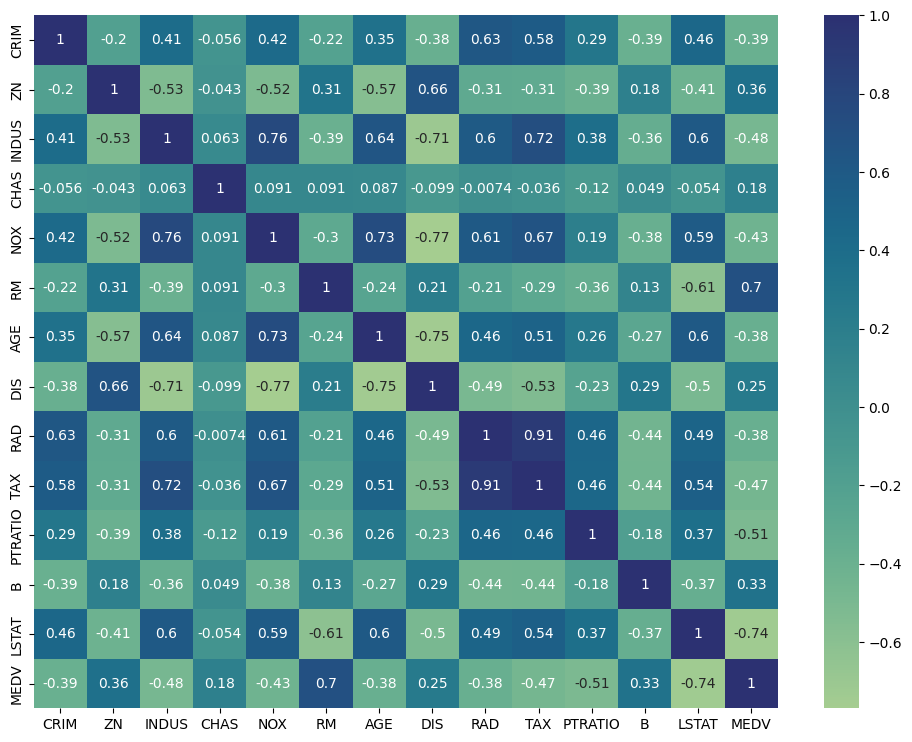

In [283]:
corr = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr, cmap='crest', annot=True)
plt.show()

dari visualisasi di atas data yang paling berkolerasi dengan data target(MEDV) yaitu :
1. RM
2. LSTAT

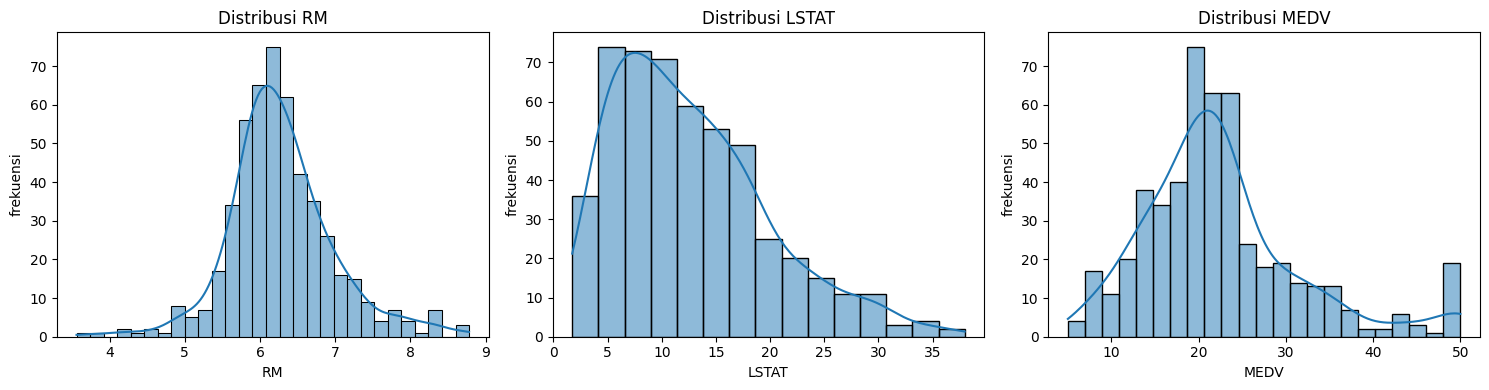

In [284]:
# Fitur penting yang akan divisualisasikan
features = ['RM', 'LSTAT', 'MEDV']

# Buat plot distribusi untuk ketiga fitur
plt.figure(figsize=(15, 4))

for i, col in enumerate(features) :
  plt.subplot(1, 3, i+1)
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribusi {col}')
  plt.ylabel('frekuensi')

plt.tight_layout()
plt.show()

Dari visualisasi diatas :
1. Distribusi fitur RM (jumlah rata-rata kamar) berbentuk mendekati normal, sehingga dapat langsung digunakan dalam model tanpa perlu transformasi.
2. Distribusi LSTAT (persentase penduduk berstatus sosial rendah) bersifat right-skewed, sehingga perlu dilakukan transformasi agar distribusinya lebih normal.
3. Distribusi MEDV (nilai median rumah) juga right-skewed dan memiliki outlier pada nilai maksimum (50), sehingga disarankan menggunakan transformasi sebelum modeling.

In [285]:
#lakukan transformasi log agar data terdistribusi normal
df['LSTAT_log'] = np.log(df['LSTAT'] + 1)
df['MEDV_log'] = np.log(df['MEDV'] + 1)

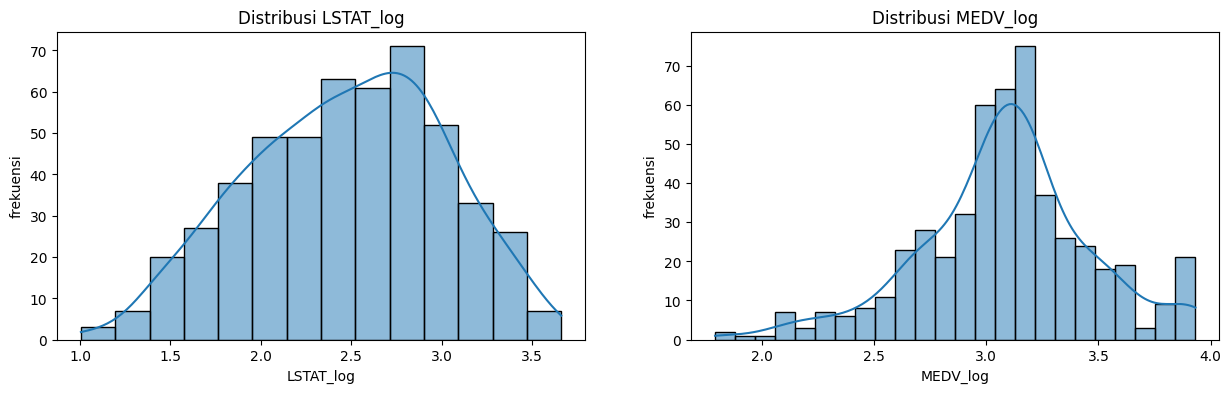

In [286]:
features = ['LSTAT_log', 'MEDV_log']
plt.figure(figsize=(15, 4))

for i, col in enumerate(features):
  plt.subplot(1, 2, i+1)
  sns.histplot(df[col], kde = True)
  plt.title(f'Distribusi {col}')
  plt.ylabel('frekuensi')

Setelah dilakukan transformasi log terhadap fitur LSTAT dan target MEDV, distribusi keduanya berubah dari yang semula right-skewed menjadi lebih simetris dan mendekati distribusi normal. Hal ini membantu meningkatkan performa model

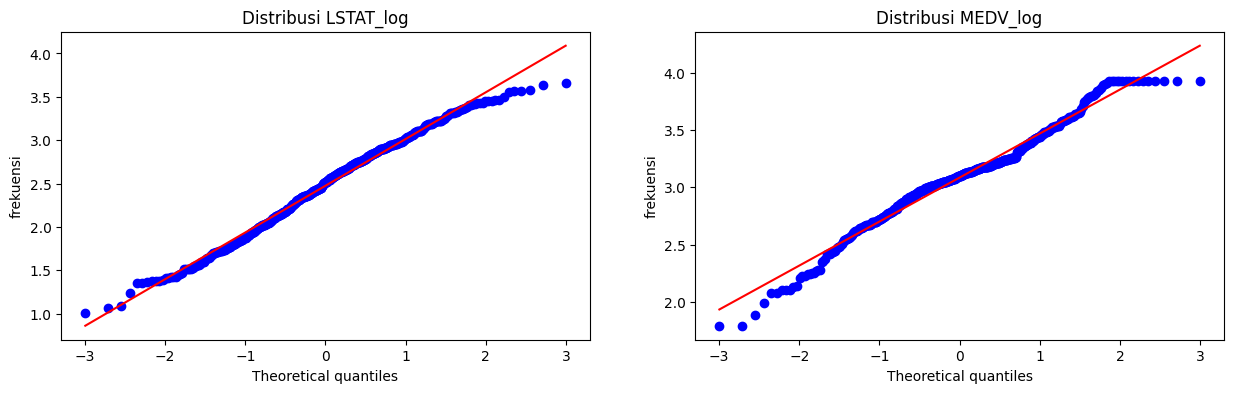

In [287]:
features = ['LSTAT_log', 'MEDV_log']
plt.figure(figsize=(15, 4))

for i, col in enumerate(features):
  plt.subplot(1, 2, i+1)
  stats.probplot(df[col], dist="norm", plot=plt)
  plt.title(f'Distribusi {col}')
  plt.ylabel('frekuensi')

Berdasarkan Q-Q Plot untuk LSTAT_log dan MEDV_log, terlihat bahwa sebagian besar titik mengikuti garis lurus teoritis. Hal ini menunjukkan bahwa transformasi log berhasil mengubah distribusi data yang semula skewed menjadi mendekati distribusi normal. Penyimpangan kecil di ujung bawah dan atas masih tergolong wajar dan tidak mempengaruhi model secara signifikan.

In [288]:
df.drop(columns=['LSTAT', 'MEDV'], inplace = True)

In [289]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [290]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [291]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [292]:
y_pred = model.predict(x_test)

In [293]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("R2 : ", r2)
print("MAE : ",mae)
print("MSE : ", mse)
print("MAPE : ", mape)

R2 :  0.7774232157267023
MAE :  0.11939977552011274
MSE :  0.030870849509315654
MAPE :  0.04114986380839173
